## WORLD'S MENTAL HEALTH STATE POST COVID19: SUICIDE PREVENTION

### SUICIDE DATA PROJECT

The novel coronavirus (COVID-19) has proven to be a threat to public health and the world's economy. However, one vital area that seems to be ignored is mental health. The importance of mental health for our physical wellbeing and for economy recovery can not be over emphasized. 

As a Biostatistician and Public Health Data scientist, I am concerned about the mental health state of the world post COVID-19. It is important that proactive measures be taken to avoid surge in rates of mental health illnesses such as depression and suicide. 

The aim of this project is to use past suicide data to identify the pattern of suicide rates in the world in reference to countries' GDP(representing the health of the economy), sex, age group and generation. 

It is expected that GDP per capita of most countries would be lower this year (2020) because of the pandemic; in the presence of a relationship between GDP or any other attribute and suicide rates, this project would help develop strategies to ensure suicide dose not become a bigger public health challenge during the pandemic and when it is over. 


### Data

**Data:** The data to be used for this project comprises of information of suicide numbers and rates across different countries of the world from 1985 to 2016. Attributes include country, year, sex, age group, generation, GDP per year, and GDP per capita.

**Data Source:** The data was downloaded from Kaggle: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

**As a requirement of the challenge, this notebook would contain exploratory data analysis to support my project choice.**

Please note: Plots will be drawn in this notebook to answer the first two questions (asset 1 and 2) hence the link to this notebook will be uploaded twice.

**First, let's import the libraries need for the analysis.**

In [1]:
import pandas as pd
import numpy as np
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

print('Libraries imported')

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Libraries imported


Now let's read the data into a pandas dataframe

In [18]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Suicide\master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Let's check the shape of the data

In [3]:
df.shape

(27820, 12)

The data has 27,820 rows and 12 columns

Let's find out if there's any missing data

In [12]:
missing=df.isnull()
missing.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [13]:
for column in missing.columns.values.tolist():
    print(column)
    print (missing[column].value_counts())
    print("")

country
False    27820
Name: country, dtype: int64

year
False    27820
Name: year, dtype: int64

sex
False    27820
Name: sex, dtype: int64

age
False    27820
Name: age, dtype: int64

suicides_no
False    27820
Name: suicides_no, dtype: int64

population
False    27820
Name: population, dtype: int64

suicides/100k pop
False    27820
Name: suicides/100k pop, dtype: int64

country-year
False    27820
Name: country-year, dtype: int64

gdp_year ($)
False    27820
Name: gdp_year ($), dtype: int64

gdp_per_capita ($)
False    27820
Name: gdp_per_capita ($), dtype: int64

generation
False    27820
Name: generation, dtype: int64



No missing data, next step is to ensure the attributes contain compatible data types for the analysis, we check information on each type using the dtypes() function.

In [4]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

Checking this, I reaslised the attribute "gdf_for_year ($)" has a space before it and that can be a challenge, it is best to change it. The column: 'HDI for year' would be dropped as it is not useful for this analysis.

The 'sex' and 'age' attributes are actegorical variables and would be converted to type integer by coding them.

In [19]:
df.drop(['HDI for year'], axis=1, inplace=True)
df.rename(columns={' gdp_for_year ($) ':'gdp_year ($)'}, inplace=True)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'gdp_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [26]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [27]:
df.age[df.age == '5-14 years'] = 1
df.age[df.age == '15-24 years'] = 2
df.age[df.age == '25-34 years'] = 3
df.age[df.age == '35-54 years'] = 4
df.age[df.age == '55-74 years'] = 5
df.age[df.age == '75+ years'] = 6

df.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,2,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,4,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,2,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,6,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,3,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [28]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [29]:
df.sex[df.sex == 'male'] = 1
df.sex[df.sex == 'female'] = 0
df.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_year ($),gdp_per_capita ($),generation
0,Albania,1987,1,2,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,1,4,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,0,2,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,1,6,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,1,3,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [30]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
gdp_year ($)           object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [31]:
df['sex']=df['sex'].astype(int)
df['age']=df['age'].astype(int)
df.dtypes

country                object
year                    int64
sex                     int32
age                     int32
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
gdp_year ($)           object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [32]:
df.describe()

,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,0.500000,3.502876,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,0.500009,1.706730,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,1.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,0.000000,2.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,0.500000,4.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,1.000000,5.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,1.000000,6.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [33]:
df.describe(include=['object'])

,country,country-year,gdp_year ($),generation
count,27820,27820,27820,27820
unique,101,2321,2321,6
top,Austria,United States2002,"6,678,178,340",Generation X
freq,382,12,12,6408


In [37]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [39]:
df['country'].nunique()

101

The dataset contains data for 101 countries.

Let's make a copy of the dat which we will manipulate for data visualisation and analysis to avoid making changes to the original data set.

In [34]:
df1=df.copy()
df1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_year ($),gdp_per_capita ($),generation
0,Albania,1987,1,2,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,1,4,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,0,2,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,1,6,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,1,3,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


Using line plot, let's visualize the average suicide rates (per 100,000 population) from 1985 to 2016

In [40]:
df1_yr=df1[['year', 'suicides/100k pop']]
df1_yr.head()

,year,suicides/100k pop
0,1987,6.71
1,1987,5.19
2,1987,4.83
3,1987,4.59
4,1987,3.28


Let's group the data according to the year by the average suicide rate per year for all countries in the data frame. We will also set year as index.

In [41]:
df1_yr=df1_yr.groupby('year').mean().reset_index()
df1_yr.set_index('year', inplace=True)
df1_yr.head()

,suicides/100k pop
year,
1985,11.826198
1986,11.423333
1987,11.644213
1988,12.709405
1989,12.879071


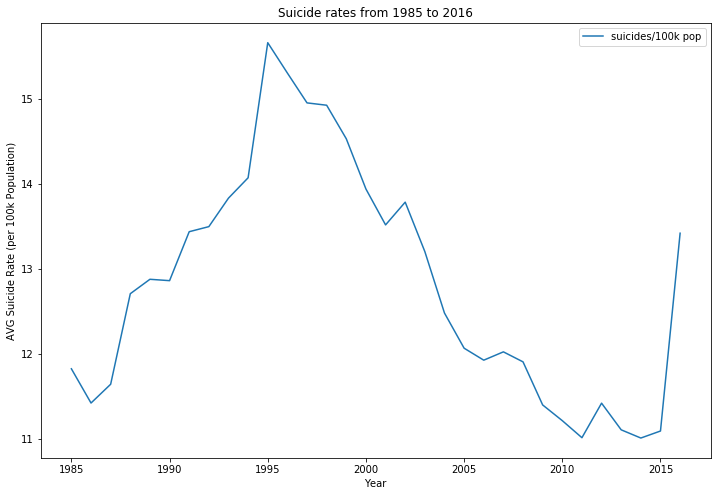

In [43]:
df1_yr.plot(kind='line', figsize=(12, 8))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('AVG Suicide Rate (per 100k Population)') # add y-label to the plot
plt.title('Suicide rates from 1985 to 2016') # add title to the plot

plt.show()


We can see a peak in the rate circa 1995 after which the rate begab to drop with some flunctuations till it reached its lowest point between 2011 and 2012. It increased again and flunctied and then shot up again between 2015 and 2016. The reason for these flunctuations will be examined in this project. 

Let's plot the suicide rate with GDP per capita to check similarities or differences in the distributions.

In [44]:
df1_gdp=df1[['year', 'gdp_per_capita ($)']]

df1_gdp.head()

,gdp_per_capita ($)
year,
1987,796
1987,796
1987,796
1987,796
1987,796


In [45]:
df1_gdp=df1_gdp.groupby('year').mean().reset_index()
df1_gdp.head()

,year,gdp_per_capita ($)
0,1985,6091.229167
1,1986,7126.104167
2,1987,8712.592593
3,1988,9983.857143
4,1989,9725.038462


In [46]:
df1_gdp.set_index('year', inplace=True)
df1_gdp.head()

,gdp_per_capita ($)
year,
1985,6091.229167
1986,7126.104167
1987,8712.592593
1988,9983.857143
1989,9725.038462


In [47]:
df1_yrmerged = df1_yr.join(df1_gdp, on='year')
df1_yrmerged.head()

,suicides/100k pop,gdp_per_capita ($)
year,,
1985,11.826198,6091.229167
1986,11.423333,7126.104167
1987,11.644213,8712.592593
1988,12.709405,9983.857143
1989,12.879071,9725.038462


Let's normalize the data so as to give better representation of interation between the two distributions

In [48]:
df1_yrmerged['suicides/100k pop'] = df1_yrmerged['suicides/100k pop']/df1_yrmerged['suicides/100k pop'].max()
df1_yrmerged['gdp_per_capita ($)'] = df1_yrmerged['gdp_per_capita ($)']/df1_yrmerged['gdp_per_capita ($)'].max()
df1_yrmerged.head()

,suicides/100k pop,gdp_per_capita ($)
year,,
1985,0.755056,0.217290
1986,0.729335,0.254207
1987,0.743437,0.310801
1988,0.811446,0.356151
1989,0.822278,0.346918


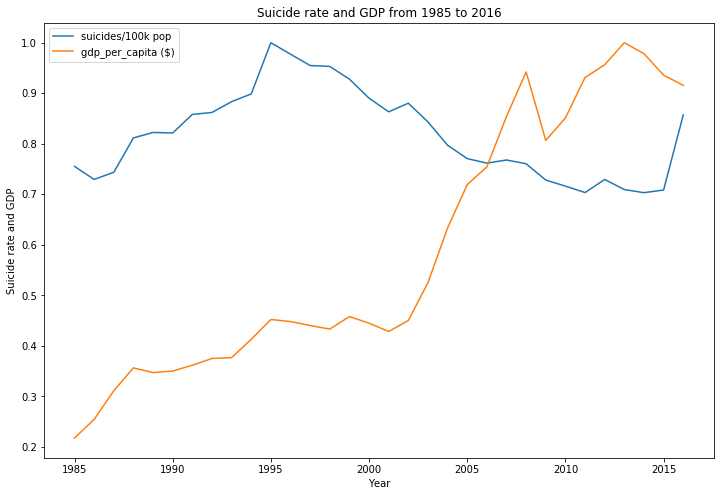

In [49]:
df1_yrmerged.plot(kind='line', figsize=(12, 8))
plt.title('Suicide rate and GDP from 1985 to 2016')
plt.ylabel('Suicide rate and GDP')
plt.xlabel('Year')

plt.show()

Let's use a scatter plot to check the presence of a relationship between suicide rate and GDP

In [62]:
x = df1_yrmerged['gdp_per_capita ($)']
y = df1_yrmerged['suicides/100k pop']

fit=np.polyfit(x, y, deg=1)

fit

array([-0.19363524,  0.93152538])

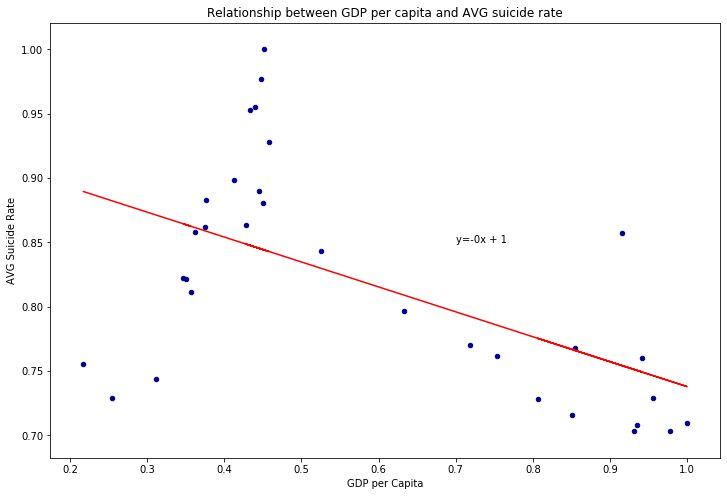

In [64]:
df1_yrmerged.plot(kind = 'scatter', x = 'gdp_per_capita ($)', y = 'suicides/100k pop', figsize=(12, 8), color='darkblue')

plt.title('Relationship between GDP per capita and AVG suicide rate')
plt.xlabel('GDP per Capita')
plt.ylabel('AVG Suicide Rate')

#plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color = 'red')
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0], fit[1]), xy=(0.70, 0.85))

plt.show()

Line of best fit shows average suicide rate reducing as GDP increases. 

In [ ]:
Let's check the distribution of total number of suicides by generation

In [66]:
df1gen=df1[['suicides_no', 'generation']]
df1gen.head()

,suicides_no,generation
0,21,Generation X
1,16,Silent
2,14,Generation X
3,1,G.I. Generation
4,9,Boomers


In [67]:
df1gengr=df1gen.groupby('generation').sum().reset_index()
df1gengr.head()

,generation,suicides_no
0,Boomers,2284498
1,G.I. Generation,510009
2,Generation X,1532804
3,Generation Z,15906
4,Millenials,623459


In [68]:
df1gengr.set_index('generation', inplace=True)
df1gengr.head()

,suicides_no
generation,
Boomers,2284498
G.I. Generation,510009
Generation X,1532804
Generation Z,15906
Millenials,623459


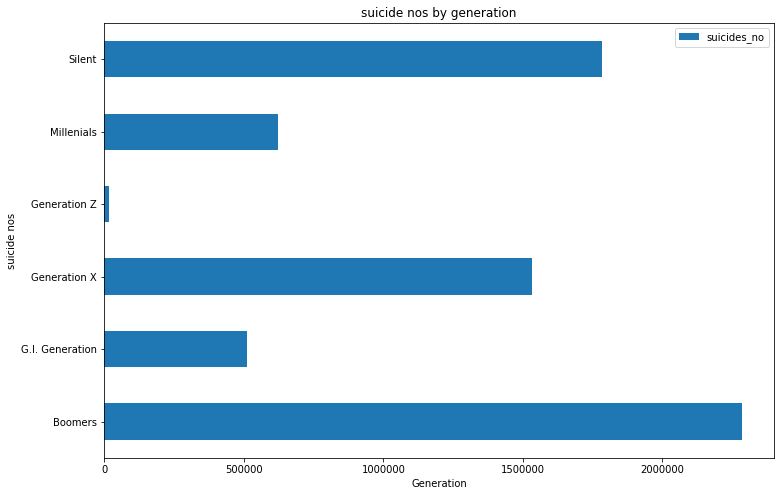

In [71]:
df1gengr.plot(kind='barh', figsize=(12, 8))
plt.title('suicide nos by generation')
plt.ylabel('suicide nos')
plt.xlabel('Generation')

plt.show()

Let's check the distribution of number of suicides by sex

In [72]:
df1sex=df1[['suicides_no', 'sex']]
df1sex.head()

,suicides_no,sex
0,21,1
1,16,1
2,14,0
3,1,1
4,9,1


In [73]:
df1sexgr=df1sex.groupby('sex').sum().reset_index()
df1sexgr.head()

,sex,suicides_no
0,0,1559510
1,1,5188910


In [75]:
df1sexgr.set_index('sex', inplace=True)
df1sexgr.head()

,suicides_no
sex,
0,1559510
1,5188910


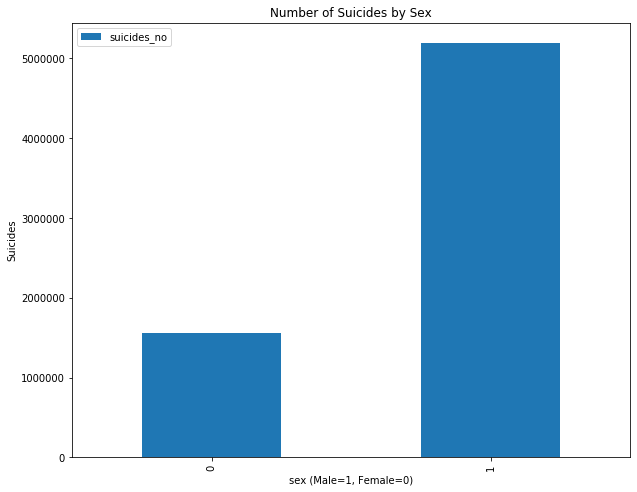

In [77]:
df1sexgr.plot(kind= 'bar', figsize=(10,8))
plt.title('Number of Suicides by Sex')
plt.xlabel('sex (Male=1, Female=0)')
plt.ylabel('Suicides')

plt.show()

The bar chart above shows that the Male sex committed more suicides than the female sex. To remove possible bias based on population, let's create a bar plot based on suicide rate per 100k population.

In [78]:
df1sex2 = df1[['sex', 'suicides/100k pop']]
df1sex2.head()

,sex,suicides/100k pop
0,1,6.71
1,1,5.19
2,0,4.83
3,1,4.59
4,1,3.28


In [79]:
df1sex2=df1sex2.groupby('sex').mean().reset_index()
df1sex2.head()

,sex,suicides/100k pop
0,0,5.392866
1,1,20.239329


In [80]:
df1sex2.set_index('sex', inplace=True)
df1sex2.head()

,suicides/100k pop
sex,
0,5.392866
1,20.239329


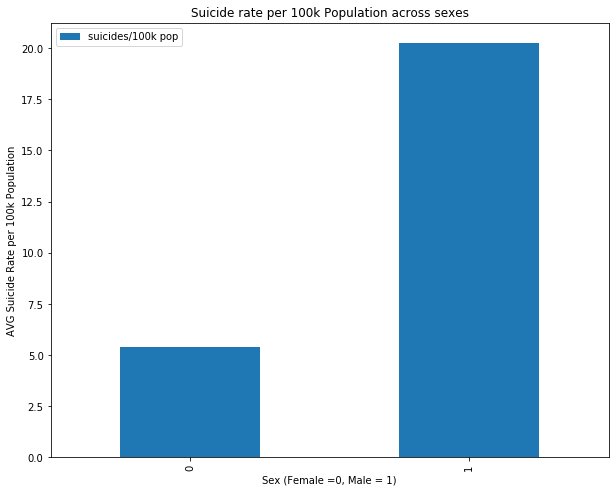

In [81]:
df1sex2.plot(kind = 'bar', figsize=(10, 8))
plt.title('Suicide rate per 100k Population across sexes')
plt.xlabel('Sex (Female =0, Male = 1)')
plt.ylabel('AVG Suicide Rate per 100k Population')

plt.show()

The bar plot still shows a higher rate of suicide among the male sex than the female sex.

Let's check the distribution across age groups.

In [98]:
df1age=df1[['age', 'suicides_no']]
df1age.head()

,age,suicides_no
0,2,21
1,4,16
2,2,14
3,6,1
4,3,9


In [99]:
df1age=df1age.groupby('age').sum().reset_index()
df1age.head()

,age,suicides_no
0,1,52264
1,2,808542
2,3,1123912
3,4,2452141
4,5,1658443


In [85]:
df1age.set_index('age', inplace = True)
df1age.head()

,suicides_no
age,
1,52264
2,808542
3,1123912
4,2452141
5,1658443


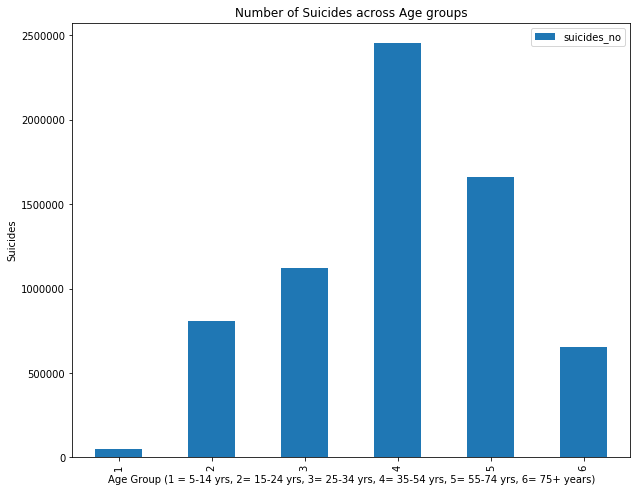

In [88]:
df1age.plot(kind='bar', figsize=(10, 8))
plt.title('Number of Suicides across Age groups')
plt.xlabel('Age Group (1 = 5-14 yrs, 2= 15-24 yrs, 3= 25-34 yrs, 4= 35-54 yrs, 5= 55-74 yrs, 6= 75+ years)')
plt.ylabel('Suicides')

plt.show()

The age group (35 - 54 years) has the highest number of suicides from 1985 to 2016.